In [1]:
%pip install -r ../requirements.txt

  Using cached pandas-2.1.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
Using cached pandas-2.1.4-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.1.4 which is incompatible.
mlflow 2.10.0 requires sqlalchemy<3,>=1.4.0, but you have sqlalchemy 1.3.24 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import numpy as np
import shap


In [22]:
df = pd.read_csv("../data/hwlw_antwerpen_mldata_windcomp.csv")
df.head()

Columns (1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994) have mixed types. Specify dtype option on import or set low_memory=False.


,station_name,tide,tij_is_HW,tide_no,timestamp,timestamp_10min,target_tide,astro_time,astro_tide,measured_tide_vlis,...,raan_ud_cat_NNW_min_48_h,raan_ud_cat_NNO_min_48_h,raan_ud_cat_WNW_min_48_h,raan_ud_cat_NO_min_48_h,raan_ud_cat_ONO_min_48_h,raan_ud_cat_O_min_48_h,raan_ud_cat_OZO_min_48_h,raan_ud_cat_ZZO_min_48_h,raan_ud_cat_Z_min_48_h,raan_ud_cat_ZO_min_48_h
0,Antwerpen tij/Zeeschelde,LW,False,20000008,2000-01-02 19:38:00,2000-01-02 19:40:00,0.09,2000-01-02 19:43:00,0.04,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Antwerpen tij/Zeeschelde,HW,True,20000009,2000-01-03 01:24:00,2000-01-03 01:20:00,5.23,2000-01-03 01:30:00,4.97,4.32,...,False,False,False,False,False,False,False,False,False,False
2,Antwerpen tij/Zeeschelde,LW,False,20000010,2000-01-03 08:28:00,2000-01-03 08:30:00,0.09,2000-01-03 08:12:00,0.10,0.60,...,False,False,False,False,False,False,False,False,False,False
3,Antwerpen tij/Zeeschelde,HW,True,20000011,2000-01-03 13:42:00,2000-01-03 13:40:00,4.50,2000-01-03 13:58:00,4.99,3.60,...,False,False,False,False,False,False,False,False,False,False
4,Antwerpen tij/Zeeschelde,LW,False,20000012,2000-01-03 20:14:00,2000-01-03 20:10:00,0.14,2000-01-03 20:37:00,-0.02,0.68,...,False,False,False,False,False,False,False,False,False,False


In [23]:
column_types = df.dtypes
print(column_types)

station_name                object
tide                        object
tij_is_HW                     bool
tide_no                      int64
timestamp                   object
                             ...  
raan_ud_cat_O_min_48_h      object
raan_ud_cat_OZO_min_48_h    object
raan_ud_cat_ZZO_min_48_h    object
raan_ud_cat_Z_min_48_h      object
raan_ud_cat_ZO_min_48_h     object
Length: 1995, dtype: object


hans_ud_cat_*
raan_ud_cat_*

In [24]:
columns = df.columns
toDrop = []
for column in columns:
    if "ud_cat" in column:
        toDrop.append(column)
    elif "comp_wind" in column:
        toDrop.append(column)

In [25]:
df = df.drop(toDrop,axis=1)
df.head()

,station_name,tide,tij_is_HW,tide_no,timestamp,timestamp_10min,target_tide,astro_time,astro_tide,measured_tide_vlis,...,value_u_hans_min_46_h,value_u_raan_min_46_h,value_ud_hans_min_47_h,value_ud_raan_min_47_h,value_u_hans_min_47_h,value_u_raan_min_47_h,value_ud_hans_min_48_h,value_ud_raan_min_48_h,value_u_hans_min_48_h,value_u_raan_min_48_h
0,Antwerpen tij/Zeeschelde,LW,False,20000008,2000-01-02 19:38:00,2000-01-02 19:40:00,0.09,2000-01-02 19:43:00,0.04,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Antwerpen tij/Zeeschelde,HW,True,20000009,2000-01-03 01:24:00,2000-01-03 01:20:00,5.23,2000-01-03 01:30:00,4.97,4.32,...,4.3,0.01,191.0,360.0,4.8,0.01,199.0,360.0,4.4,0.01
2,Antwerpen tij/Zeeschelde,LW,False,20000010,2000-01-03 08:28:00,2000-01-03 08:30:00,0.09,2000-01-03 08:12:00,0.10,0.60,...,4.0,0.01,250.0,360.0,4.7,0.01,240.0,360.0,5.1,0.01
3,Antwerpen tij/Zeeschelde,HW,True,20000011,2000-01-03 13:42:00,2000-01-03 13:40:00,4.50,2000-01-03 13:58:00,4.99,3.60,...,1.3,0.01,318.0,360.0,3.0,0.01,326.0,360.0,4.1,0.01
4,Antwerpen tij/Zeeschelde,LW,False,20000012,2000-01-03 20:14:00,2000-01-03 20:10:00,0.14,2000-01-03 20:37:00,-0.02,0.68,...,3.5,0.01,210.0,360.0,4.5,0.01,227.0,360.0,3.9,0.01


In [26]:
df = df.drop(['station_name','tide_no','timestamp_10min','astro_time','measured_tide_vlis'],axis=1)
df.head()

,tide,tij_is_HW,timestamp,target_tide,astro_tide,astro_tide_vlis,measured_tide_lw_min1,astro_tide_lw_min1,measured_tide_vlis_lw_min1,astro_tide_vlis_lw_min1,...,value_u_hans_min_46_h,value_u_raan_min_46_h,value_ud_hans_min_47_h,value_ud_raan_min_47_h,value_u_hans_min_47_h,value_u_raan_min_47_h,value_ud_hans_min_48_h,value_ud_raan_min_48_h,value_u_hans_min_48_h,value_u_raan_min_48_h
0,LW,False,2000-01-02 19:38:00,0.09,0.04,0.75,0.22,0.31,0.76,1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HW,True,2000-01-03 01:24:00,5.23,4.97,4.11,0.09,0.04,0.63,0.75,...,4.3,0.01,191.0,360.0,4.8,0.01,199.0,360.0,4.4,0.01
2,LW,False,2000-01-03 08:28:00,0.09,0.10,0.90,0.09,0.04,0.63,0.75,...,4.0,0.01,250.0,360.0,4.7,0.01,240.0,360.0,5.1,0.01
3,HW,True,2000-01-03 13:42:00,4.50,4.99,4.11,0.09,0.10,0.60,0.90,...,1.3,0.01,318.0,360.0,3.0,0.01,326.0,360.0,4.1,0.01
4,LW,False,2000-01-03 20:14:00,0.14,-0.02,0.71,0.09,0.10,0.60,0.90,...,3.5,0.01,210.0,360.0,4.5,0.01,227.0,360.0,3.9,0.01


In [27]:
df = df.drop(['measured_tide_lw_min1','measured_tide_vlis_lw_min1','measured_tide_hw_min1','measured_tide_vlis_hw_min1'],axis=1)
df.head()

,tide,tij_is_HW,timestamp,target_tide,astro_tide,astro_tide_vlis,astro_tide_lw_min1,astro_tide_vlis_lw_min1,measured_tide_lw_min2,astro_tide_lw_min2,...,value_u_hans_min_46_h,value_u_raan_min_46_h,value_ud_hans_min_47_h,value_ud_raan_min_47_h,value_u_hans_min_47_h,value_u_raan_min_47_h,value_ud_hans_min_48_h,value_ud_raan_min_48_h,value_u_hans_min_48_h,value_u_raan_min_48_h
0,LW,False,2000-01-02 19:38:00,0.09,0.04,0.75,0.31,1.02,0.21,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HW,True,2000-01-03 01:24:00,5.23,4.97,4.11,0.04,0.75,0.22,0.31,...,4.3,0.01,191.0,360.0,4.8,0.01,199.0,360.0,4.4,0.01
2,LW,False,2000-01-03 08:28:00,0.09,0.10,0.90,0.04,0.75,0.22,0.31,...,4.0,0.01,250.0,360.0,4.7,0.01,240.0,360.0,5.1,0.01
3,HW,True,2000-01-03 13:42:00,4.50,4.99,4.11,0.10,0.90,0.09,0.04,...,1.3,0.01,318.0,360.0,3.0,0.01,326.0,360.0,4.1,0.01
4,LW,False,2000-01-03 20:14:00,0.14,-0.02,0.71,0.10,0.90,0.09,0.04,...,3.5,0.01,210.0,360.0,4.5,0.01,227.0,360.0,3.9,0.01


In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')


In [29]:
df.head()

,tide,tij_is_HW,timestamp,target_tide,astro_tide,astro_tide_vlis,astro_tide_lw_min1,astro_tide_vlis_lw_min1,measured_tide_lw_min2,astro_tide_lw_min2,...,value_u_hans_min_46_h,value_u_raan_min_46_h,value_ud_hans_min_47_h,value_ud_raan_min_47_h,value_u_hans_min_47_h,value_u_raan_min_47_h,value_ud_hans_min_48_h,value_ud_raan_min_48_h,value_u_hans_min_48_h,value_u_raan_min_48_h
0,LW,False,2000-01-02 19:38:00,0.09,0.04,0.75,0.31,1.02,0.21,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HW,True,2000-01-03 01:24:00,5.23,4.97,4.11,0.04,0.75,0.22,0.31,...,4.3,0.01,191.0,360.0,4.8,0.01,199.0,360.0,4.4,0.01
2,LW,False,2000-01-03 08:28:00,0.09,0.10,0.90,0.04,0.75,0.22,0.31,...,4.0,0.01,250.0,360.0,4.7,0.01,240.0,360.0,5.1,0.01
3,HW,True,2000-01-03 13:42:00,4.50,4.99,4.11,0.10,0.90,0.09,0.04,...,1.3,0.01,318.0,360.0,3.0,0.01,326.0,360.0,4.1,0.01
4,LW,False,2000-01-03 20:14:00,0.14,-0.02,0.71,0.10,0.90,0.09,0.04,...,3.5,0.01,210.0,360.0,4.5,0.01,227.0,360.0,3.9,0.01


In [46]:
trainingSet = df[df['timestamp']< pd.to_datetime("2023-01-19T13:12:00.000")]
testSet = df[df['timestamp']>= pd.to_datetime("2023-01-19T13:12:00.000")]


In [47]:
trainingSet['timestamp'] = trainingSet['timestamp'].dt.month
testSet['timestamp'] = testSet['timestamp'].dt.month



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
testSet = testSet.drop(['tide'],axis=1)
trainingSet = trainingSet.drop(['tide'],axis=1)


In [49]:
column_types = trainingSet.dtypes
print(column_types)

tij_is_HW                    bool
timestamp                   int32
target_tide               float64
astro_tide                float64
astro_tide_vlis           float64
                           ...   
value_u_raan_min_47_h     float64
value_ud_hans_min_48_h    float64
value_ud_raan_min_48_h    float64
value_u_hans_min_48_h     float64
value_u_raan_min_48_h     float64
Length: 221, dtype: object


In [50]:
Ytrain = trainingSet['target_tide']
Ytest = testSet['target_tide']

Xtrain = trainingSet.drop(['target_tide'],axis=1)
Xtest = testSet.drop(['target_tide'],axis=1)


In [51]:
toDrop = []
for column in Xtrain.columns:
    if Xtrain[column].isna().any():
        print(f"Column '{column}' contains NaN values:")
        toDrop.append(column)

Xtrain = Xtrain.drop(toDrop,axis=1)
Xtest = Xtest.drop(toDrop,axis=1)

Column 'value_ud_hans_min_44_h' contains NaN values:
Column 'value_ud_raan_min_44_h' contains NaN values:
Column 'value_u_hans_min_44_h' contains NaN values:
Column 'value_u_raan_min_44_h' contains NaN values:
Column 'value_ud_hans_min_45_h' contains NaN values:
Column 'value_ud_raan_min_45_h' contains NaN values:
Column 'value_u_hans_min_45_h' contains NaN values:
Column 'value_u_raan_min_45_h' contains NaN values:
Column 'value_ud_hans_min_46_h' contains NaN values:
Column 'value_ud_raan_min_46_h' contains NaN values:
Column 'value_u_hans_min_46_h' contains NaN values:
Column 'value_u_raan_min_46_h' contains NaN values:
Column 'value_ud_hans_min_47_h' contains NaN values:
Column 'value_ud_raan_min_47_h' contains NaN values:
Column 'value_u_hans_min_47_h' contains NaN values:
Column 'value_u_raan_min_47_h' contains NaN values:
Column 'value_ud_hans_min_48_h' contains NaN values:
Column 'value_ud_raan_min_48_h' contains NaN values:
Column 'value_u_hans_min_48_h' contains NaN values:
Co

In [52]:
for column in Xtrain.columns:
    if Xtrain[column].isna().any():
        print(f"Column '{column}' contains NaN values:")


In [59]:
Xtrain.columns

Index(['tij_is_HW', 'timestamp', 'astro_tide', 'astro_tide_vlis',
       'astro_tide_lw_min1', 'astro_tide_vlis_lw_min1',
       'measured_tide_lw_min2', 'astro_tide_lw_min2',
       'measured_tide_vlis_lw_min2', 'astro_tide_vlis_lw_min2',
       ...
       'value_u_hans_min_41_h', 'value_u_raan_min_41_h',
       'value_ud_hans_min_42_h', 'value_ud_raan_min_42_h',
       'value_u_hans_min_42_h', 'value_u_raan_min_42_h',
       'value_ud_hans_min_43_h', 'value_ud_raan_min_43_h',
       'value_u_hans_min_43_h', 'value_u_raan_min_43_h'],
      dtype='object', length=200)

## Ridge

In [98]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.01)
clf.fit(Xtrain,Ytrain)

RidgeCV(alphas=array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06]))

In [99]:
predictions = clf.predict(Xtest)

In [100]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.03824281358142527
baseline: de RMSE error op de test set is: 0.19555769885490387


In [67]:
coefficients = clf.coef_
sorted_features = sorted(zip(Xtrain.columns, coefficients), key=lambda x: x[1], reverse=True)
print('Feature Coefficients:')
for feature, coefficient in sorted_features:
    print(f'{feature}: {coefficient}')


Feature Coefficients:
tij_is_HW: 1.3140973788999486
astro_tide_vlis: 0.8609135530887111
measured_tide_hw_min2: 0.3588778285314371
measured_tide_lw_min2: 0.26675032782288627
astro_tide: 0.13302951300977126
measured_tide_lw_min3: 0.09172463233450623
astro_tide_vlis_hw_min1: 0.0778104671884116
astro_tide_vlis_lw_min1: 0.05113903588931236
measured_tide_vlis_hw_min3: 0.039965009605120526
astro_tide_lw_min3: 0.038447986654242115
astro_tide_hw_min3: 0.006351401086933022
value_u_raan_min_3_h: 0.004728920946066417
value_u_raan_min_4_h: 0.004654062684515028
value_u_hans_min_25_h: 0.004489198209594808
value_u_hans_min_22_h: 0.003751836798280616
value_u_raan_min_2_h: 0.0035231639432802197
value_u_hans_min_11_h: 0.0034872442663589657
value_u_hans_min_24_h: 0.0034518982151674604
value_u_hans_min_13_h: 0.0030397044159049275
value_u_hans_min_16_h: 0.0030108448381485696
value_u_hans_min_18_h: 0.0028521327890542307
value_u_raan_min_10_h: 0.0025171321027083315
value_u_hans_min_20_h: 0.00249887053617083
t

(3.0, 7.0)

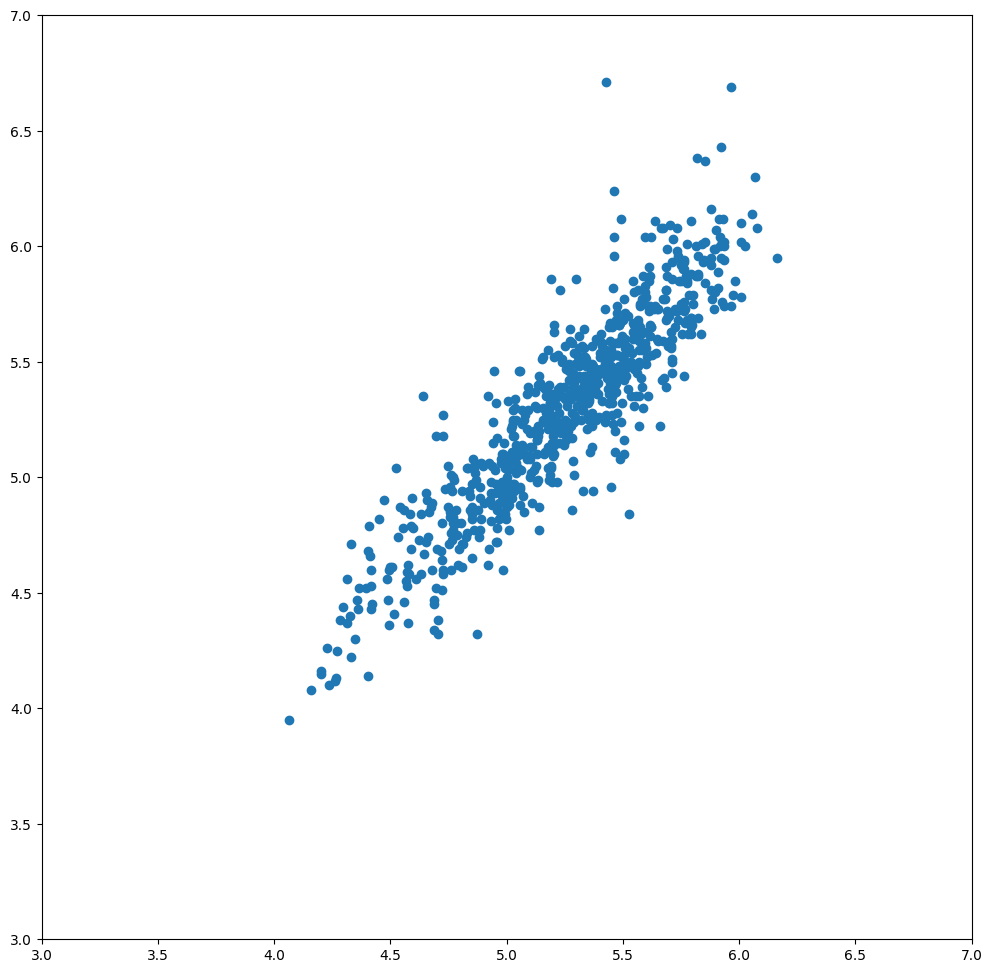

In [71]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest)
plt.title("High tide performance Ridge")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.xlim(3, 7)
plt.ylim(3, 7)

## MLP

In [94]:
from sklearn.neural_network import MLPRegressor

neuraal_netwerk_vorm = (32,16,16, 8)

mlp = MLPRegressor(hidden_layer_sizes=neuraal_netwerk_vorm,random_state=1)
mlp.fit(Xtrain,Ytrain)
predictions = mlp.predict(Xtest)




In [95]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.0463660318647673
baseline: de RMSE error op de test set is: 0.2153277312952684


(3.0, 7.0)

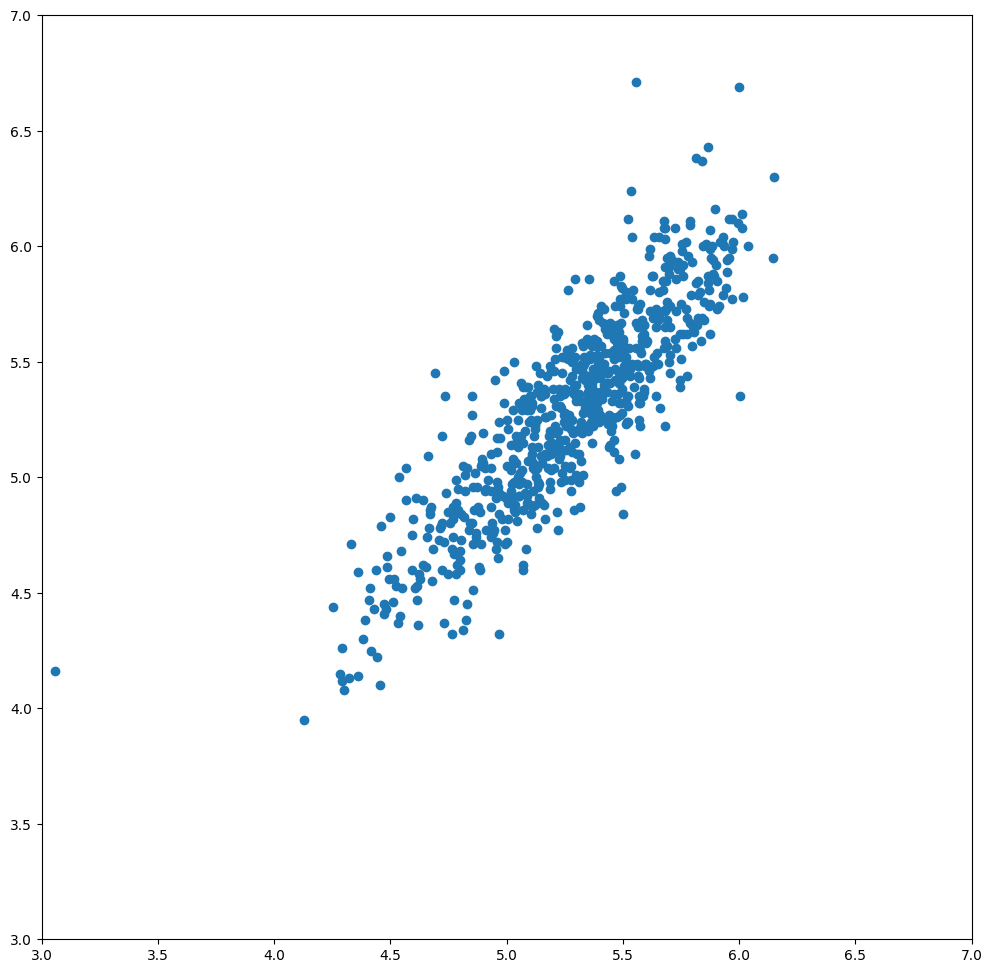

In [96]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest)
plt.title("High tide performance MLP")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.xlim(3, 7)
plt.ylim(3, 7)

## Ridge CV

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, root_mean_squared_error

alphas = np.logspace(-6, 6, 25)
clf = linear_model.RidgeCV(alphas=alphas)
clf.fit(Xtrain,Ytrain)

predictions = clf.predict(Xtest)

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

## Decision Tree

In [105]:
from sklearn import tree


decTree = tree.DecisionTreeRegressor(max_depth=8) 
decTree.fit(Xtrain, Ytrain)
predictions= decTree.predict(Xtest)

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.042572995717249165
baseline: de RMSE error op de test set is: 0.20633224594631147


In [108]:
from sklearn.ensemble import RandomForestRegressor

diepte = 8
aantalBomen = 25 

rf = RandomForestRegressor(max_depth=diepte, n_estimators=aantalBomen) 
rf.fit(Xtrain, Ytrain)
predictions= rf.predict(Xtest)

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.031667414931498286
baseline: de RMSE error op de test set is: 0.17795340663077594


In [115]:
from sklearn.ensemble import HistGradientBoostingRegressor

aantalBomen = 200 
diepte = 7

ensambleTree = HistGradientBoostingRegressor(max_iter= aantalBomen, max_depth=diepte)
ensambleTree.fit(Xtrain, Ytrain)
predictions= ensambleTree.predict(Xtest)
tree_test_MSE = mean_squared_error(Ytest,predictions)
print(f"GradientBoosting ensamble: de MSE error op de test set is: {tree_test_MSE}")
tree_test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"GradientBoosting ensamble: de RMSE error op de test set is: {tree_test_RMSE}")

GradientBoosting ensamble: de MSE error op de test set is: 0.024025117726862156
GradientBoosting ensamble: de RMSE error op de test set is: 0.15500037976360626


(3.0, 7.0)

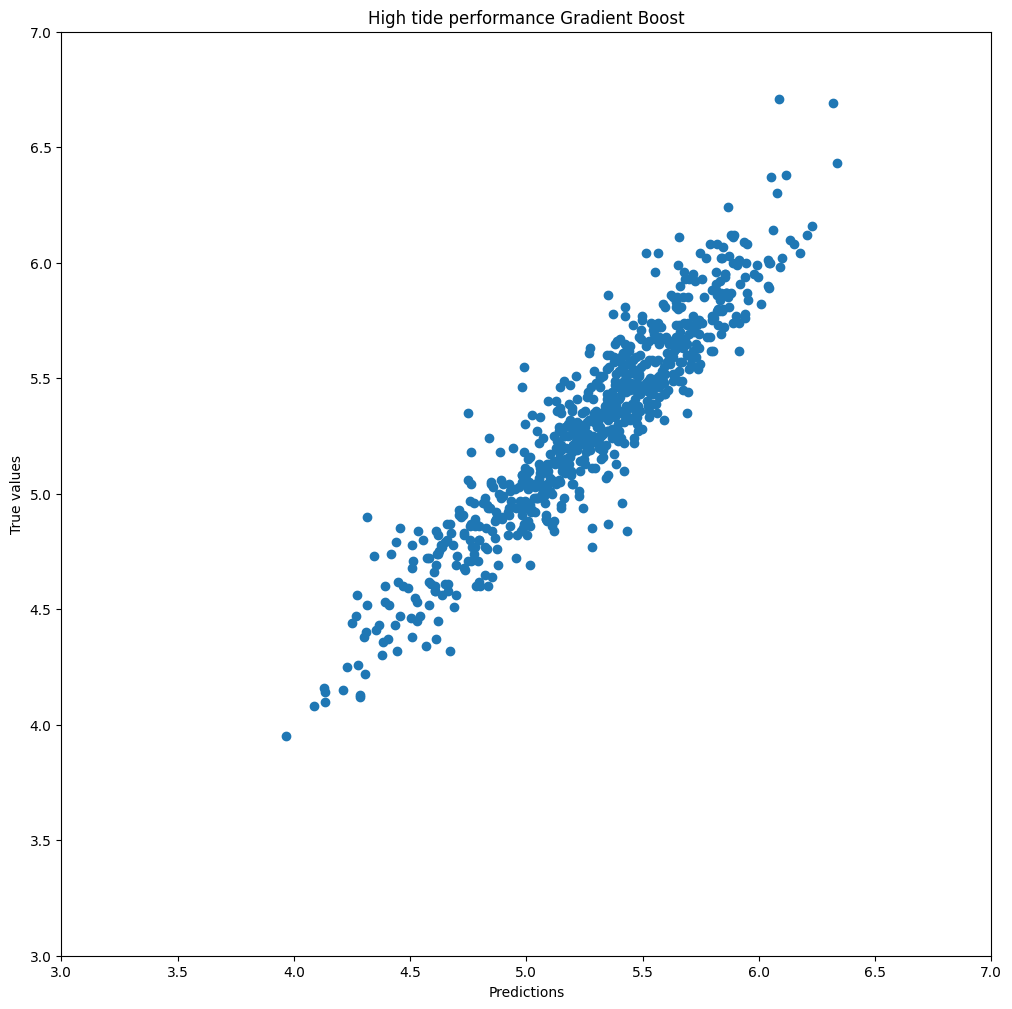

In [119]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest)
plt.title("High tide performance Gradient Boost")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.xlim(3, 7)
plt.ylim(3, 7)